**Business Requirement Document**
Step 1:
Business Understanding:


*   Business problem: Predicting the cancer for new patients based on the past data of different patients.
*   Business Objective: Predicting the correct cancer patients from iven data of the customer.
*   Business Constraint: Minimizing the doctor consultation .






Step 2:
Data Understanding:
  

* Collecting the  dataset, that have information from the various patients having different columns which are used to predict the cancer patient.
*  checking for any null values, eliminating the outliers.



In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Path to dataset files: /root/.cache/kagglehub/datasets/jillanisofttech/lung-cancer-detection/versions/1
Found CSV file: /root/.cache/kagglehub/datasets/jillanisofttech/lung-cancer-detection/versions/1/survey lung cancer.csv
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1       

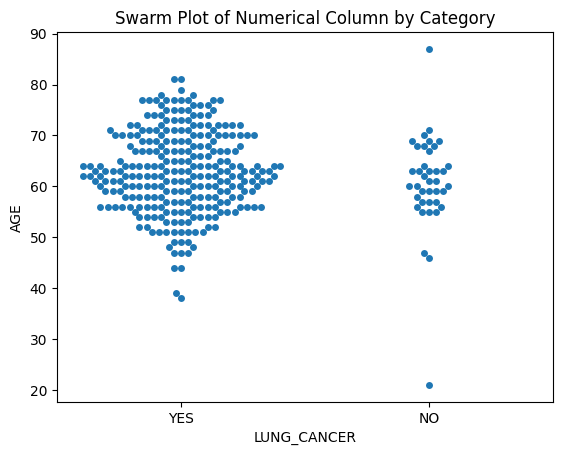

In [21]:

path = kagglehub.dataset_download("jillanisofttech/lung-cancer-detection")

print("Path to dataset files:", path)
csv_file=None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break
if csv_file is None:
    print("No CSV file found in the downloaded dataset.")
else:
  print(f"Found CSV file: {csv_file}")
df = pd.read_csv(csv_file)
print(df.head())
print(df.info())
print(df.describe())
sns.swarmplot(data=df, x='LUNG_CANCER', y='AGE')
plt.title("Swarm Plot of Numerical Column by Category")
plt.show()

step3:
Data Preperation:
from above understanding, I observed  every datatype is in int but only two columns are in object type . Now converting that object datatype columns in to int by using labelencoding. So that i can perform any machine learning model to predict the cancer patients.

for Gender column:
Male:1
Female:0

for LUNG_CANCER column:
yes:1
no:0

And we are normalising the data.


In [ ]:



label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
print("Encoded Gender Column:\n", df['GENDER'].head())

print("Encoded lung_cancer Column:\n", df['LUNG_CANCER'].head())




scaler = MinMaxScaler()
df_normalised= scaler.fit_transform(df)
df_normalised = pd.DataFrame(df_normalised, columns=df.columns)

print("Normalised Dataset:\n", df_normalised.head())

Encoded Gender Column:
 0    1
1    1
2    0
3    1
4    0
Name: GENDER, dtype: int64
Encoded lung_cancer Column:
 0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64
Normalised Dataset:
    GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     1.0  0.727273      0.0             1.0      1.0            0.0   
1     1.0  0.803030      1.0             0.0      0.0            0.0   
2     0.0  0.575758      0.0             0.0      0.0            1.0   
3     1.0  0.636364      1.0             1.0      1.0            0.0   
4     0.0  0.636364      0.0             1.0      0.0            0.0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0              0.0       1.0       0.0       1.0                1.0       1.0   
1              1.0       1.0       1.0       0.0                0.0       0.0   
2              0.0       1.0       0.0       1.0                0.0       1.0   
3              0.0       0.0       0.0  

Step4:
Modeling

*   Here the dataset is labeled and we are predicting yes or no which is binary . so we can use logistic regression model from the supervised machine learning.
*   Here i have performed the cross validation by taking 5 folds





In [ ]:

y = df['LUNG_CANCER']
independent_data = df.drop(columns=['LUNG_CANCER'])
X_train, X_test, y_train, y_test = train_test_split(independent_data, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=500)
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=["Actual: No Cancer", "Actual: Cancer"],
                              columns=["Predicted: No Cancer", "Predicted: Cancer"])


class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix_df)
print("Classification Report:\n", class_report)

Cross-Validation Scores: [0.88       0.86       0.93877551 0.89795918 0.91836735]
Mean CV Score: 0.90
Accuracy: 0.97
Confusion Matrix:
                    Predicted: No Cancer  Predicted: Cancer
Actual: No Cancer                     1                  1
Actual: Cancer                        1                 59
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



The model is excellent at identifying cancer patients but struggles to identify non-cancer patients, as shown by low precision and recall for the non-cancer class. If identifying non-cancer patients accurately is important, you might consider techniques like adjusting class weights, collecting more non-cancer samples, or exploring other models to improve performance for the non-cancer class.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.9516129032258065
Confusion Matrix:
 [[ 1  1]
 [ 2 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



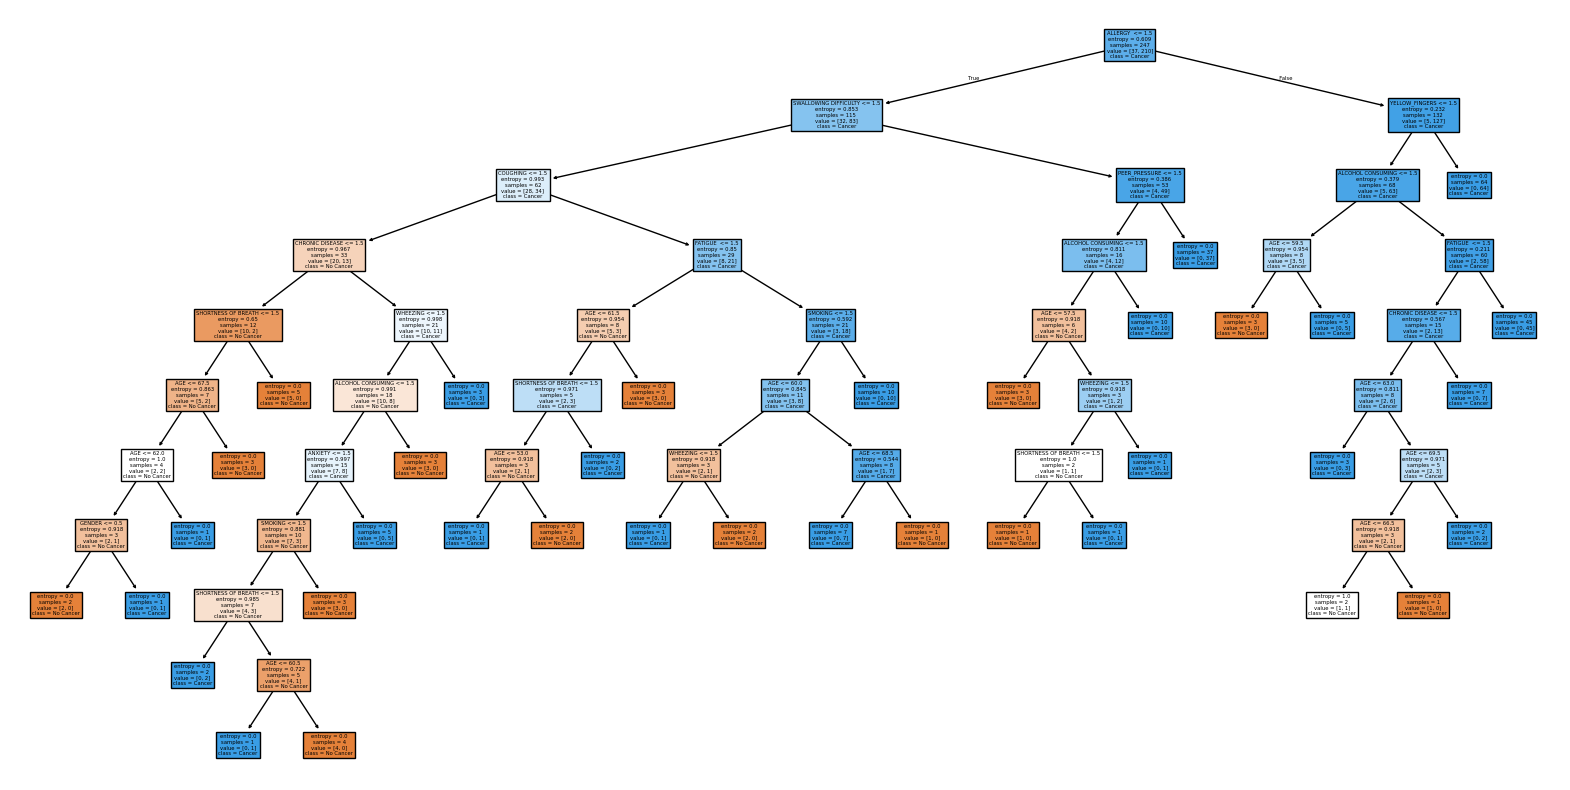

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('LUNG_CANCER', axis=1)  # Replace 'Cancer' with the actual column name for the target variable
y = df['LUNG_CANCER']  # The target column (e.g., 0 for no cancer, 1 for cancer)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = clf.predict(X_test)
print(y_pred)
# Step 4: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["No Cancer", "Cancer"], filled=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the classifier with initial settings
clf = DecisionTreeClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and print parameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


Accuracy: 0.9354838709677419
Confusion Matrix:
 [[ 1  1]
 [ 3 57]]


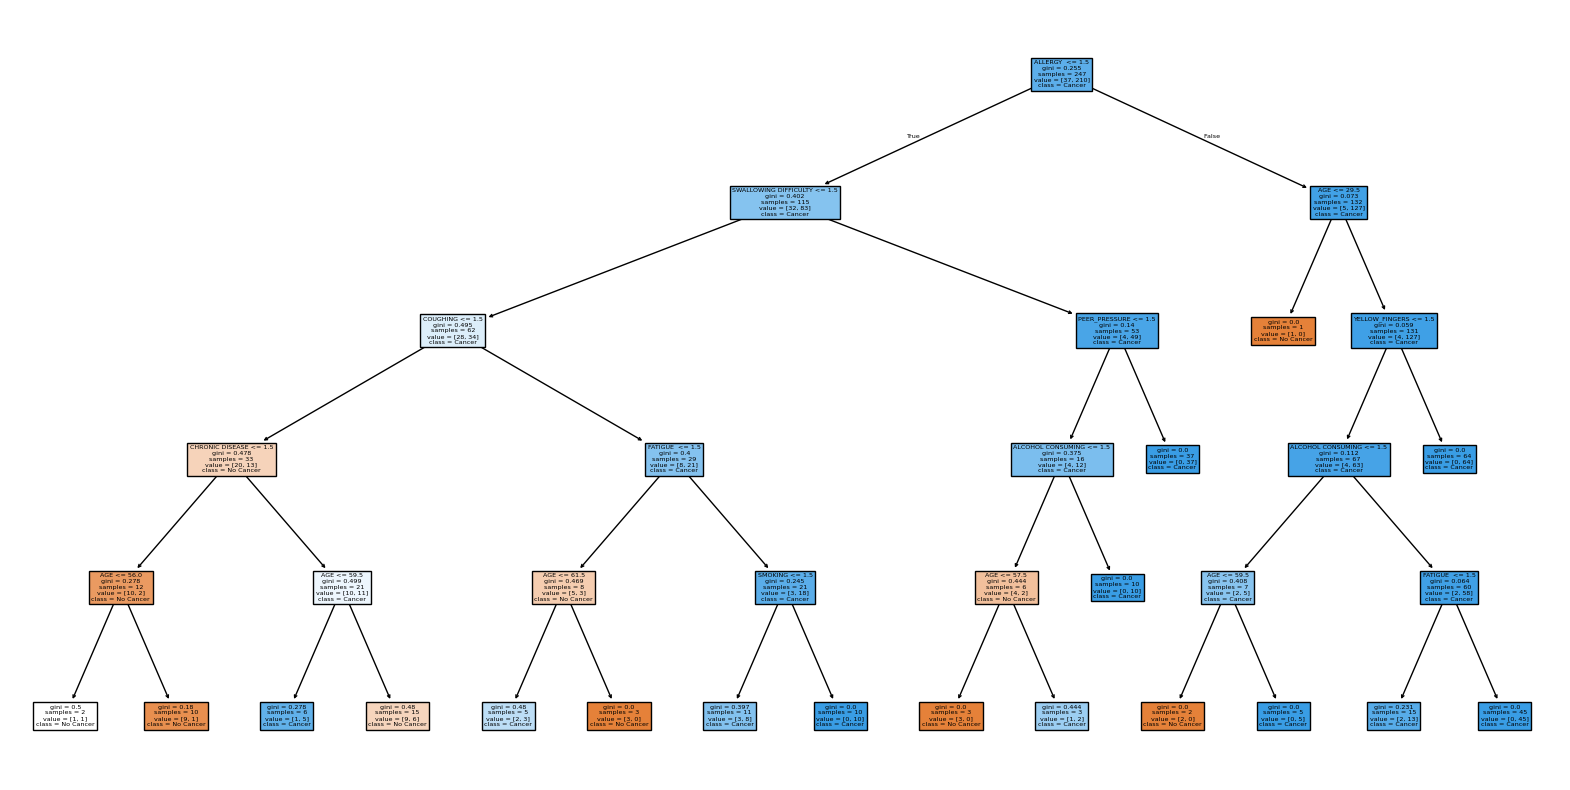

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



In [ ]:

best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, feature_names=X.columns, class_names=["No Cancer", "Cancer"], filled=True)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and target (y)
X = df.drop('LUNG_CANCER', axis=1)  # Replace 'Cancer' with the actual column name for the target variable
y = df['LUNG_CANCER']  # The target column (e.g., 0 for no cancer, 1 for cancer)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Decision Tree Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = rf.predict(X_test)
print(y_pred)
# Step 4: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best Cross-Validation Accuracy: 0.8783673469387754
Test Accuracy with Best Parameters: 0.967741935483871


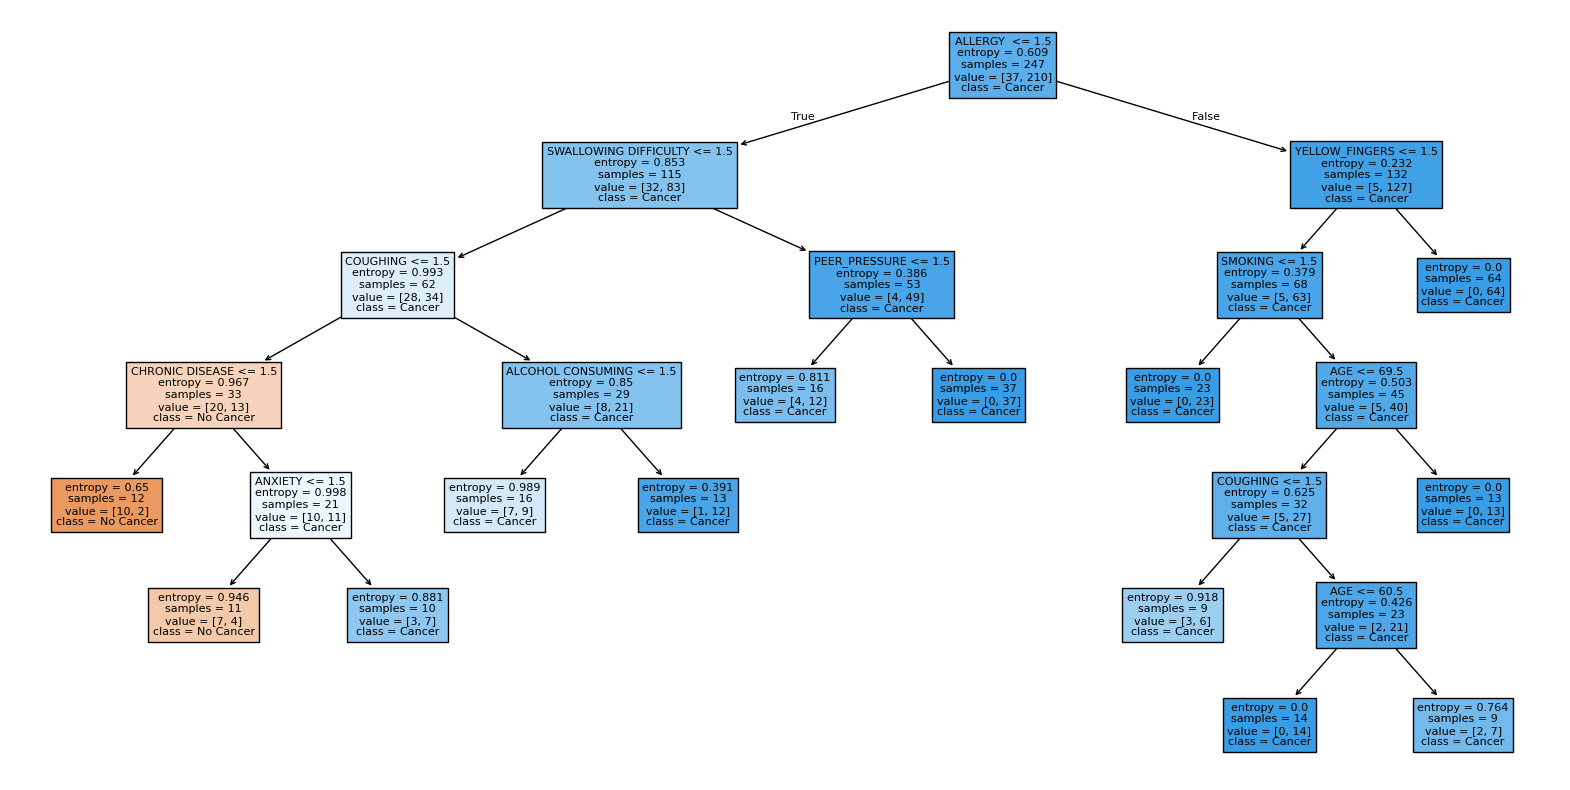

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter distribution
param_dist = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=50,          # Number of random combinations to try
    scoring='accuracy',  # Scoring metric
    cv=5,               # 5-fold cross-validation
    random_state=42,
    n_jobs=-1           # Use all available cores
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score from RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Retrieve the best model from RandomizedSearchCV
best_clf = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_clf.predict(X_test)

# Calculate and print the test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", accuracy)
plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, feature_names=X.columns, class_names=["No Cancer", "Cancer"], filled=True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),             # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),              # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],                  # Number of features to consider for the best split
    'bootstrap': [True, False]                         # Whether bootstrap samples are used
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                 # Number of random combinations to try
    scoring='accuracy',         # Scoring metric
    cv=5,                       # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                   # Use all available cores
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score from RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Retrieve the best model from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test)

# Calculate and print the test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.8947755102040815
Test Accuracy with Best Parameters: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.95
Confusion Matrix:
 [[ 1  1]
 [ 2 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define a parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Initialize SVM
model = SVC()

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

print("Best Kernel:", grid_search.best_params_['kernel'])
print("Best Parameters:", grid_search.best_params_)


Best Kernel: linear
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:


model = SVC(kernel='linear')  # Start with linear kernel; try 'rbf' for non-linear relationships

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.97
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

